# Criação de Dados para teste

Dados de treino

<Axes: xlabel='x', ylabel='y'>

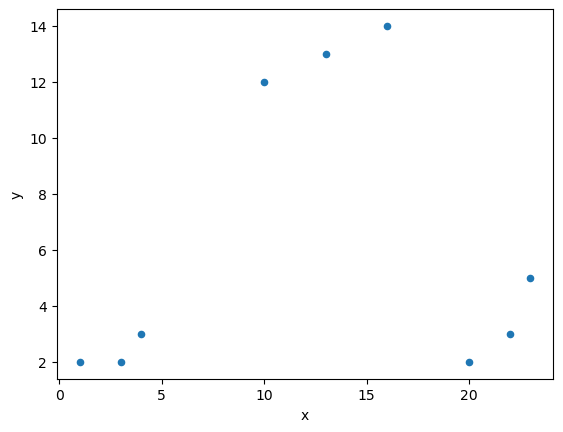

In [1]:
import pandas as pd

dados = [[1,2],
        [3,2],
        [4,3],
        [10,12],
        [13,13],
        [16,14],
        [20,2],
        [22,3],
        [23,5]]
dados
df = pd.DataFrame(dados, columns=['x','y'])
df.plot(x='x', y='y', kind='scatter')

Dados de teste

<Axes: xlabel='x', ylabel='y'>

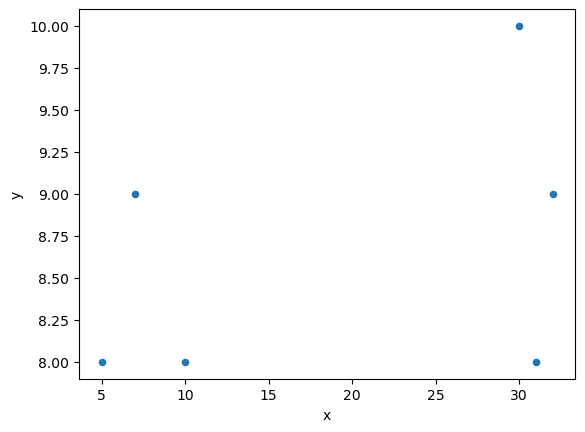

In [2]:
dados_teste = [[5,8],
              [7,9],
              [10,8],
              [30,10],
              [31,8],
              [32,9]]
df_teste = pd.DataFrame(dados_teste, columns=['x','y']) 
df_teste.plot(x='x', y='y', kind='scatter')

Vendo dados juntos

<Axes: xlabel='x', ylabel='y'>

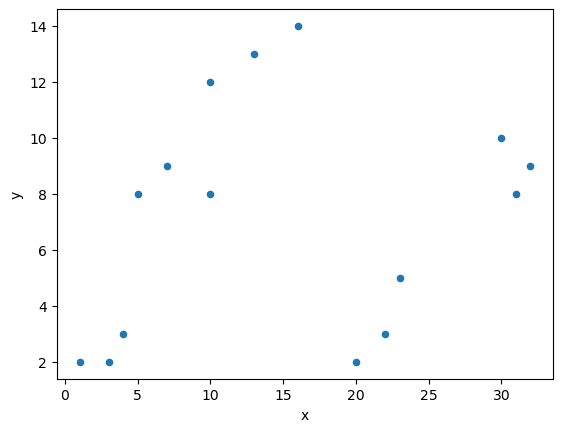

In [3]:
df_juntos = pd.merge(df, df_teste, how = 'outer')
df_juntos.plot(x='x', y='y', kind='scatter')   

# Normalização de dados
- A fazer

Normalizar os dados para que fiquem na mesma distribuição.

# Aplicando algoritmos de agrupamento de dados

## K-means

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
rotulos_k_means = kmeans.labels_
rotulos_k_means

c:\Users\migue\miniconda3\envs\spyder-env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 2, 2, 2, 0, 0, 0])

Mostrando dados agrupados pelo K-means

<Axes: xlabel='x', ylabel='y'>

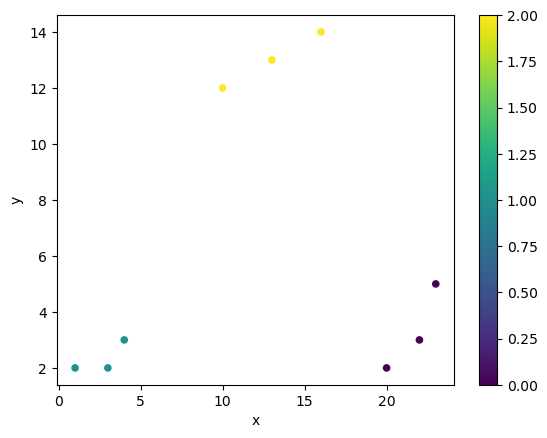

In [5]:
df.plot(x='x', y='y', kind='scatter', c=rotulos_k_means, cmap='viridis')

Predict do K-means

Ele serve para prever a qual cluster novos dados pertencem, usando os centroides já calculados.
Porém adiciona todos os dados a algum cluster, não diferenciando outliers.

In [6]:
rotulos_k_means_predict = kmeans.predict(df_teste)
rotulos_k_means_predict = pd.DataFrame(rotulos_k_means_predict, columns=['rotulos'])
rotulos_k_means = pd.DataFrame(rotulos_k_means, columns=['rotulos'])
rotulos_k_means_plot = pd.concat([rotulos_k_means, rotulos_k_means_predict])['rotulos'].values
rotulos_k_means_plot


array([1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0])

<Axes: xlabel='x', ylabel='y'>

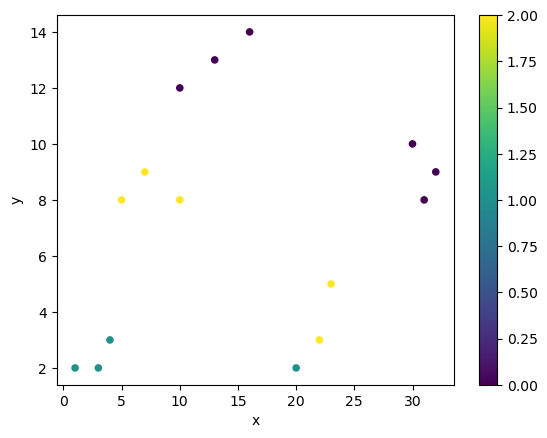

In [7]:
df_juntos.plot(x='x', y='y', kind='scatter', c=rotulos_k_means_plot, cmap='viridis')

## DBSCAN

In [8]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4, min_samples=2)
dbscan.fit(df)
rotulos_dbscan = dbscan.labels_
rotulos_dbscan

array([0, 0, 0, 1, 1, 1, 2, 2, 2], dtype=int64)

Mostrando os dados agrupados pelo DBSCAN

<Axes: xlabel='x', ylabel='y'>

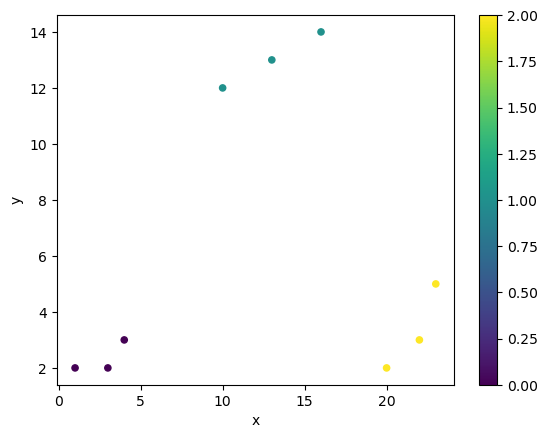

In [9]:
df.plot(x='x', y='y', kind='scatter', c=rotulos_dbscan, cmap='viridis')

## Por que o DBSCAN não tem predict?
O DBSCAN não pode prever clusters para novos pontos porque:

1) Ele não define fronteiras ou centroides claros como o K-Means.
2) Os clusters dependem diretamente dos dados usados durante o ajuste, e adicionar novos pontos pode alterar o agrupamento existente.

Se for necessário classificar novos pontos após o ajuste, você teria que:

- Ajustar novamente o modelo, incluindo os novos dados.

Então ele precisa treinar novamente toda vez que receber novos dados, assim ele retorna os novos clusters para os novos dados.
1) fit = Treinar
2) predict = Prever e Retornar


Predict do DBSCAN

In [10]:
dbscan.fit_predict(df_teste)

array([0, 0, 0, 1, 1, 1], dtype=int64)

Precisamos treinar com todos os dados, os originais e os novos.

In [11]:
rotulos_dbscan_fit_predict = dbscan.fit_predict(df_juntos)
rotulos_dbscan_fit_predict

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3], dtype=int64)

Mostrando os dados agrupados pelo DBSCAN após o *fit_predict*

<Axes: xlabel='x', ylabel='y'>

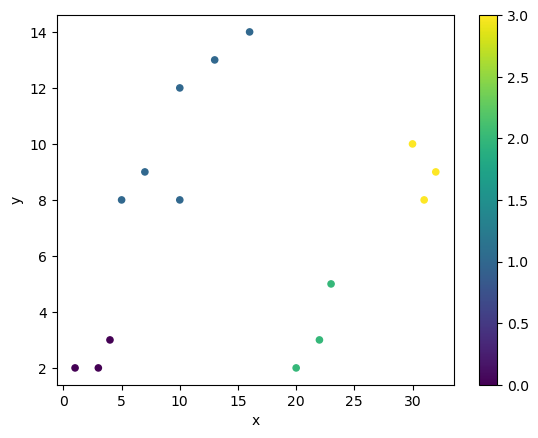

In [12]:
df_juntos.plot(x='x', y='y', kind='scatter', c=rotulos_dbscan_fit_predict, cmap='viridis')

Podemos ver a diferença de agrupamento de dados do DBSCAN para o K means nesse gráfico, como o calculo baseado em densidade ao invés de numero de clusters faz toda a diferença.

# Modelos de previsão

## Arvore de Decisão

Manipulando o dataset

Importando uma biblioteca que separa o nosso dataset para treino e testes de validação

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    df, rotulos_k_means, test_size=0.33, random_state=42)

Visualizando os dados de treino e teste e validação

In [15]:
X_test, y_test

(    x   y
 7  22   3
 1   3   2
 5  16  14,
    rotulos
 7        0
 1        1
 5        2)

Treino

In [16]:
tree_df_train = pd.merge(X_train, y_train, left_index=True, right_index=True)
tree_df_train

,x,y,rotulos
0,1,2,1
8,23,5,0
2,4,3,1
4,13,13,2
3,10,12,2
6,20,2,0


Teste

In [17]:
tree_df_test = pd.merge(X_test, y_test, left_index=True, right_index=True)
tree_df_test

,x,y,rotulos
7,22,3,0
1,3,2,1
5,16,14,2


Validação

In [18]:
tree_df_validation = pd.merge(df,rotulos_k_means, left_index=True, right_index=True)
tree_df_validation

,x,y,rotulos
0,1,2,1
1,3,2,1
2,4,3,1
3,10,12,2
4,13,13,2
5,16,14,2
6,20,2,0
7,22,3,0
8,23,5,0


- Features entrada - (x,y)
- Features alvo - Targets(Rotulo K-means)

Importar biblioteca de arvore de decisão

In [19]:
from sklearn import tree

Criando a arvore

In [20]:
arvore = tree.DecisionTreeClassifier(random_state=42,max_depth=10)

Treinado a arvore

In [21]:
arvore.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

Visualizando a arvore

[Text(0.4, 0.8333333333333334, 'x <= 7.0\ngini = 0.667\nsamples = 6\nvalue = [2, 2, 2]\nclass = 0'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = 1'),
 Text(0.6, 0.5, 'y <= 8.5\ngini = 0.5\nsamples = 4\nvalue = [2, 0, 2]\nclass = 0'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = 0'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = 2')]

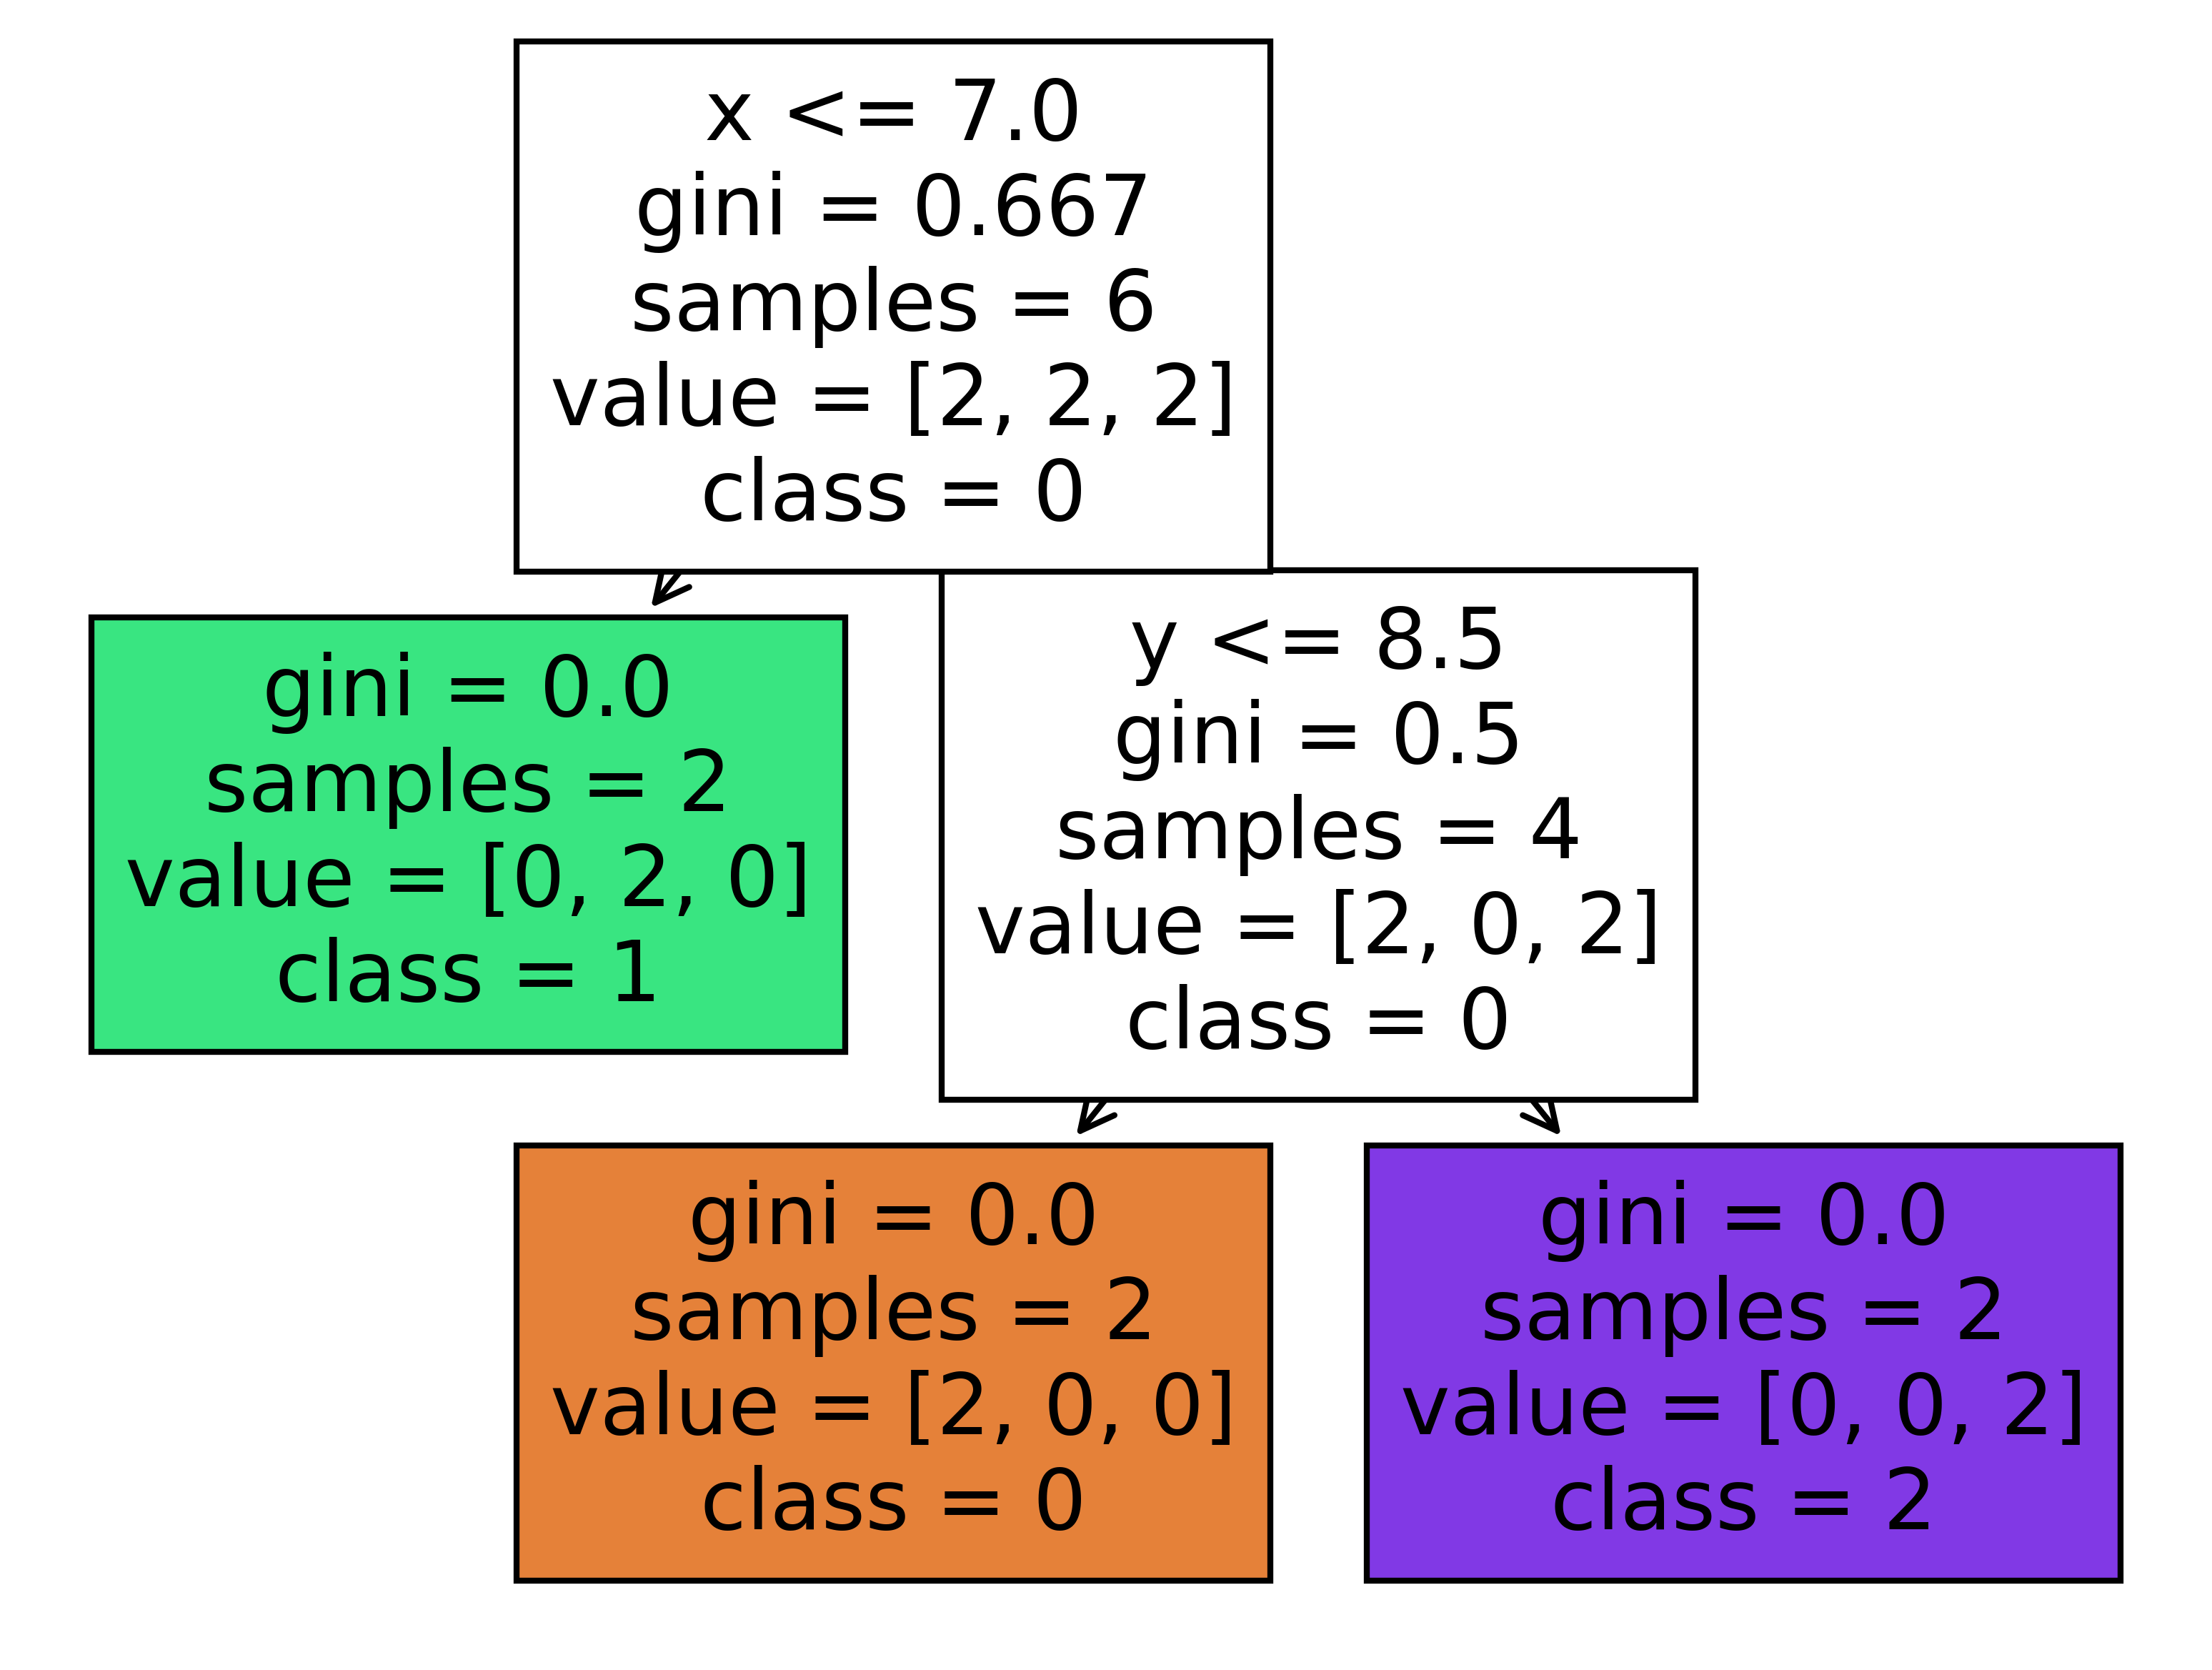

In [22]:
import matplotlib.pyplot as plt
plt.figure(dpi=600)

features = [str(x) for x in X_train.columns]

class_names = [str(cls) for cls in arvore.classes_]

tree.plot_tree(arvore, class_names=class_names, feature_names=features, filled=True)

- value = [2,2,2] -> Quantidade de rotulos para cada grupo, temos 3 grupos e dois rotulos para cada grupo
- samples é a quantidade de valores presentes no nó atual
- class é o grupo em que os valores estão assinalados de acordo com a condição

Fazendo os testes

In [23]:
arvore.predict(X_test), y_test

(array([0, 1, 2]),
    rotulos
 7        0
 1        1
 5        2)

Vendo o predict com probabilidade

In [24]:
proba = arvore.predict_proba(X_test)
pd.DataFrame(proba, columns=class_names)

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


Usar o predict com probabilidade é mais seguro

Fazendo a validação com os dados que foram treinados

In [25]:
proba_train = arvore.predict_proba(X_train)
print(y_train)
pd.DataFrame(proba_train, columns=class_names)

   rotulos
0        1
8        0
2        1
4        2
3        2
6        0


,0,1,2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


Fazendo a validação com os dados originais

In [26]:
proba_orig = arvore.predict_proba(df)
print(rotulos_k_means)
pd.DataFrame(proba_orig, columns=class_names)

   rotulos
0        1
1        1
2        1
3        2
4        2
5        2
6        0
7        0
8        0


,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0


Calculando os scores de cada predict

In [27]:
#X_test
print(arvore.score(X_test, y_test))
#X_train
print(arvore.score(X_train, y_train))
#X_original
print(arvore.score(df, rotulos_k_means))

1.0
1.0
1.0


Usando o predict com dados novos

In [28]:
proba_test = arvore.predict_proba(df_teste)
print(rotulos_k_means_predict)
pd.DataFrame(proba_test, columns=class_names)

   rotulos
0        1
1        2
2        2
3        0
4        0
5        0


,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,0.0,1.0


<Axes: xlabel='x', ylabel='y'>

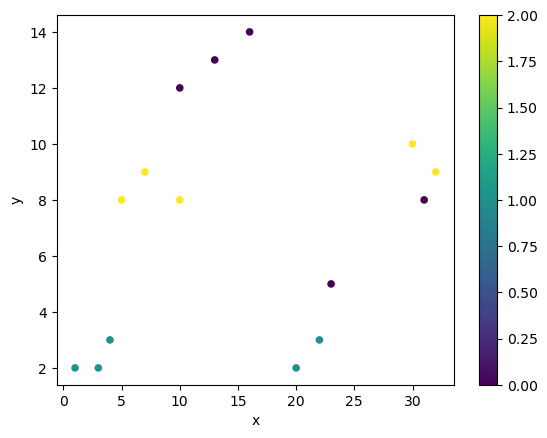

In [29]:
predict = arvore.predict(df_teste)
predict = pd.DataFrame(predict, columns=['rotulos'])
predict = pd.concat([rotulos_k_means, predict])['rotulos'].values
df_juntos.plot(x='x', y='y', kind='scatter', c=predict, cmap='viridis')

<Axes: xlabel='x', ylabel='y'>

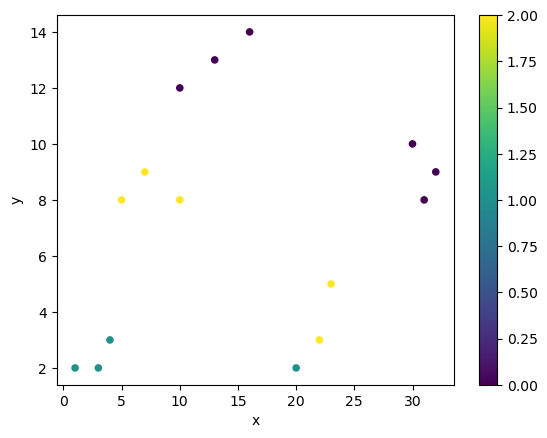

In [30]:
df_juntos.plot(x='x', y='y', kind='scatter', c=rotulos_k_means_plot, cmap='viridis')

Treinando com todos os dados